# BASEBALL CASE STUDY

Problem Statement: This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)        

In [56]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [14]:
# Importing Data
df=pd.read_csv("baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [15]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Here with the help of head function we can top 5 rows

In [16]:
df.shape

(30, 17)

There are 30 rows and 17 columns in this dataset

In [17]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

This is used to check the details of columns

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


This function is used to see the statistics of the data which can be used later on

In [19]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All data types are integer except ERA which is a float type.

In [20]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no nulll values in this datatype.

In [22]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

As we can see here there are no missing values in the target columns

# Data Visualization

## Univariate Analysis

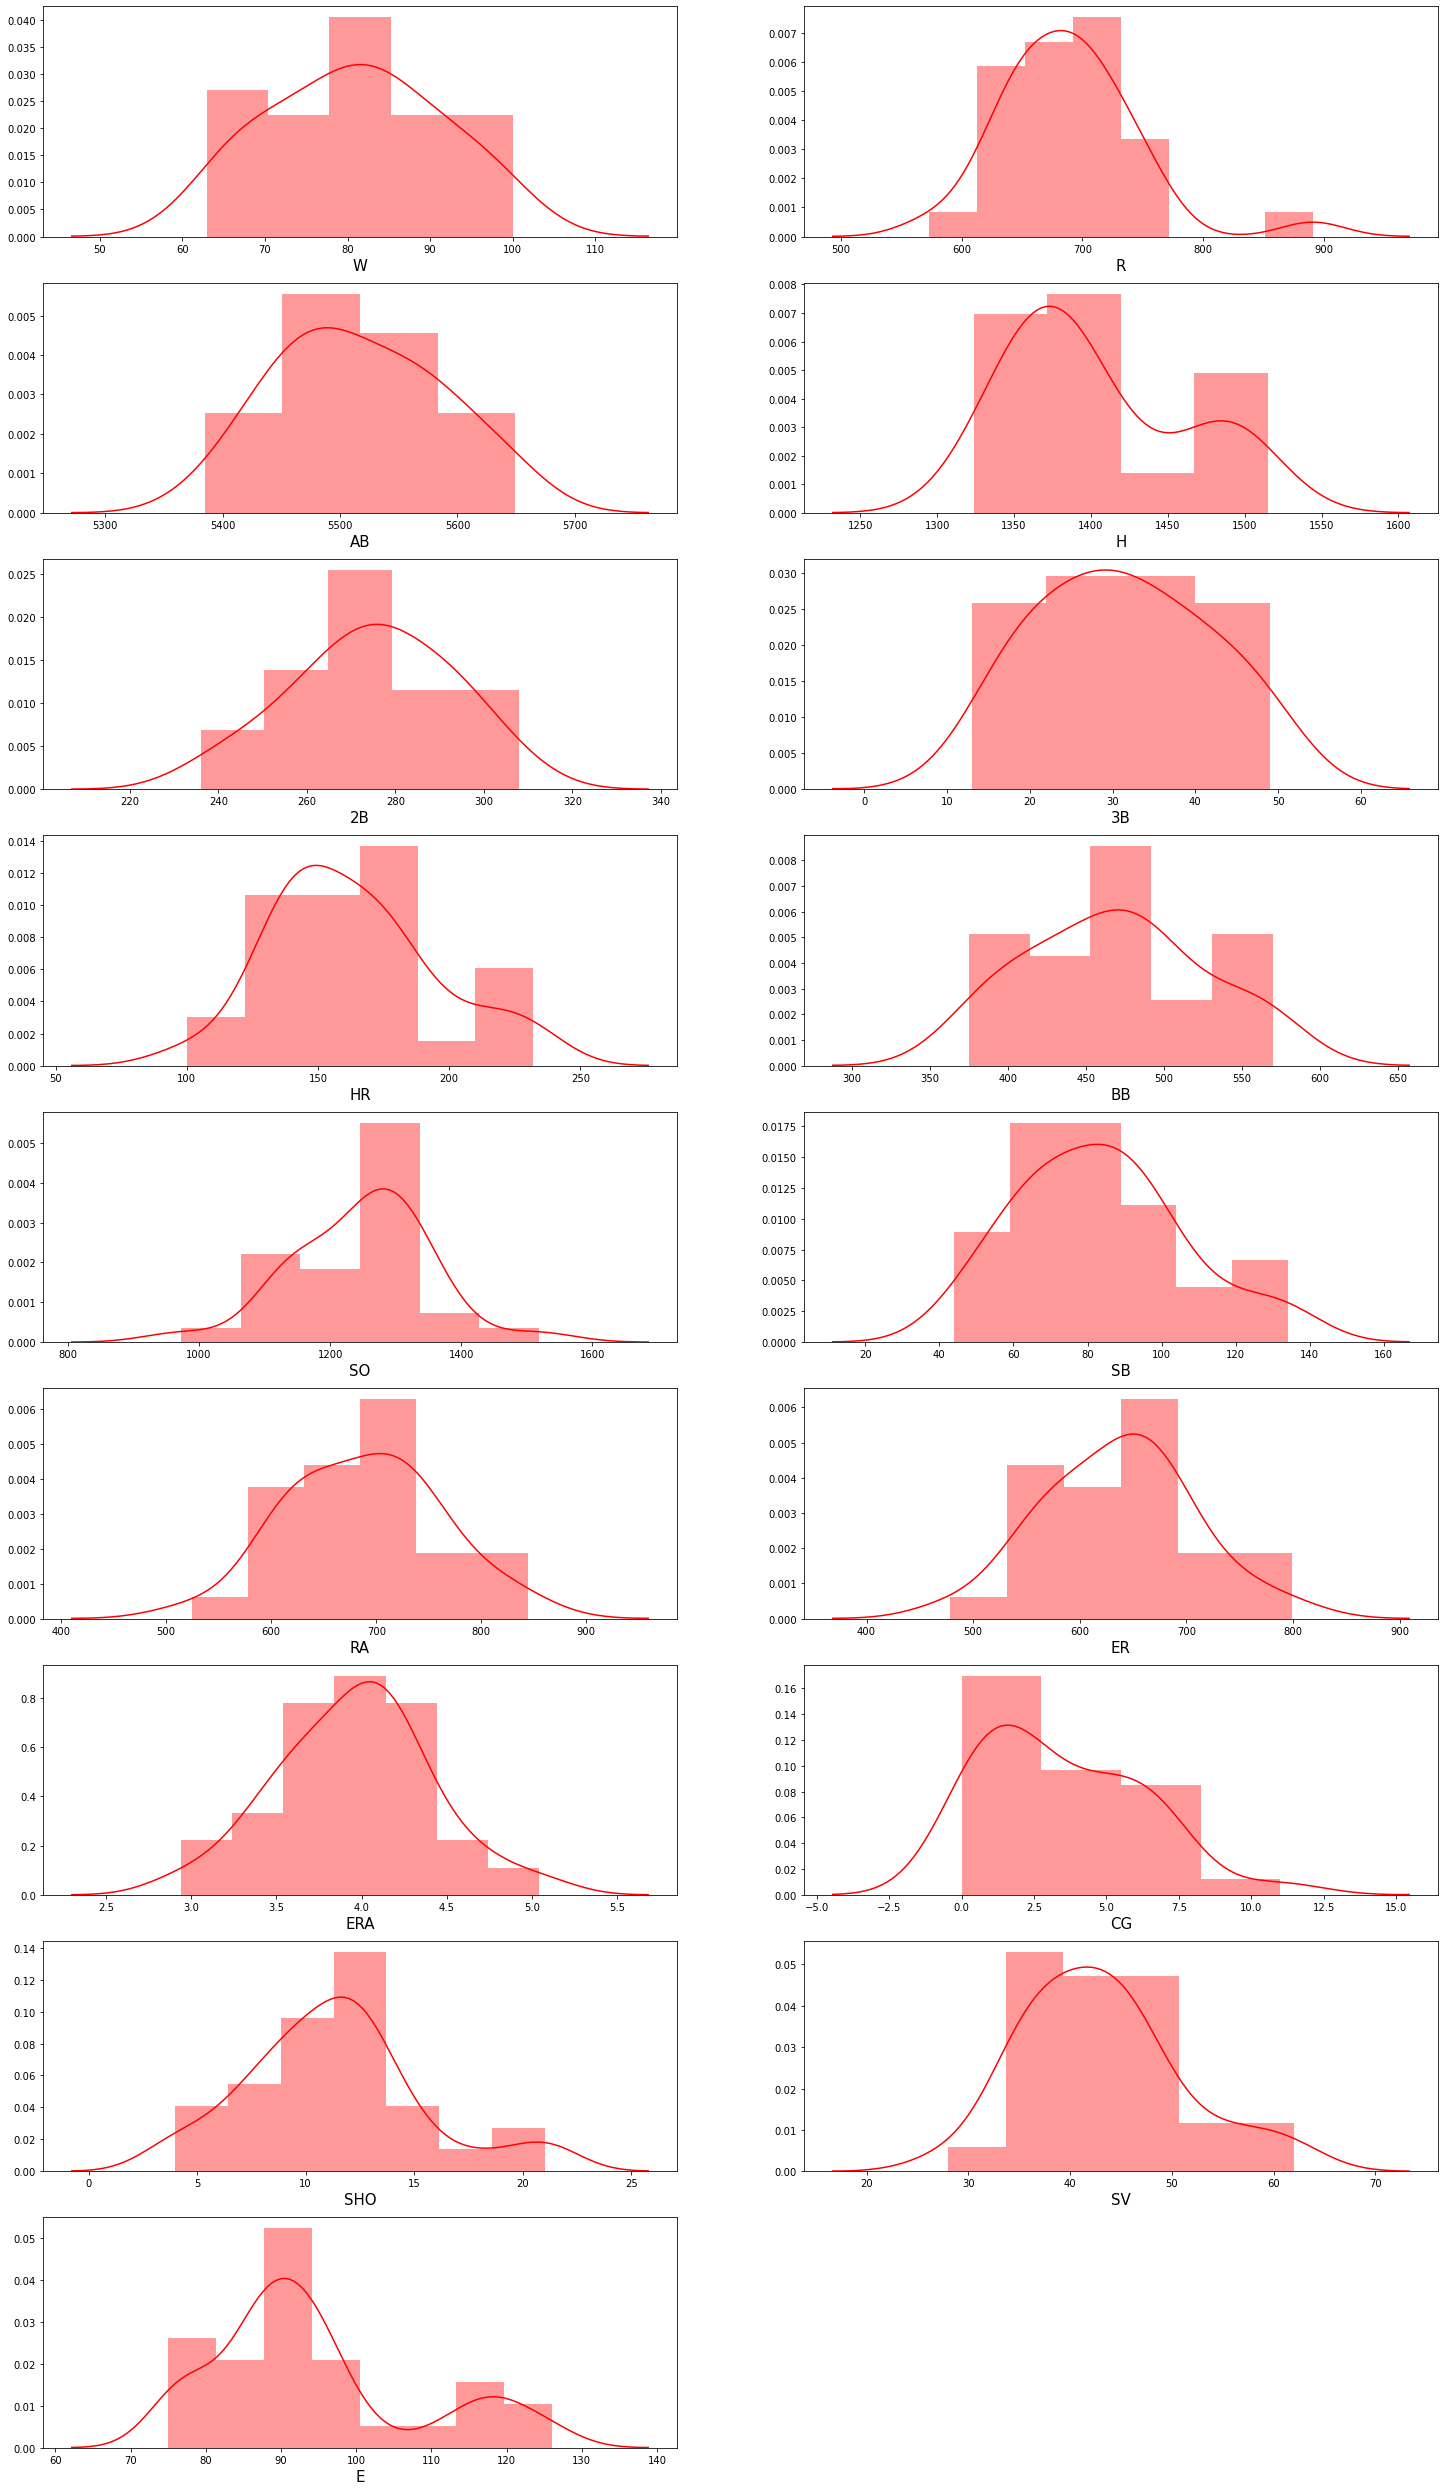

In [23]:
plt.figure(figsize = (25,50), facecolor = 'white')
eda=1

for column in df:
    if eda<=20:
        ax=plt.subplot(10,2,eda)
        sns.distplot(df[column], color = 'r')
        plt.xlabel(column,fontsize=15)
        
    eda +=1
plt.show()

As shown above there is some skewness in some of the input variables while other data columns are normally distributed. So we will have to remove the skewness from the input variables.

# Bivariate Analysis

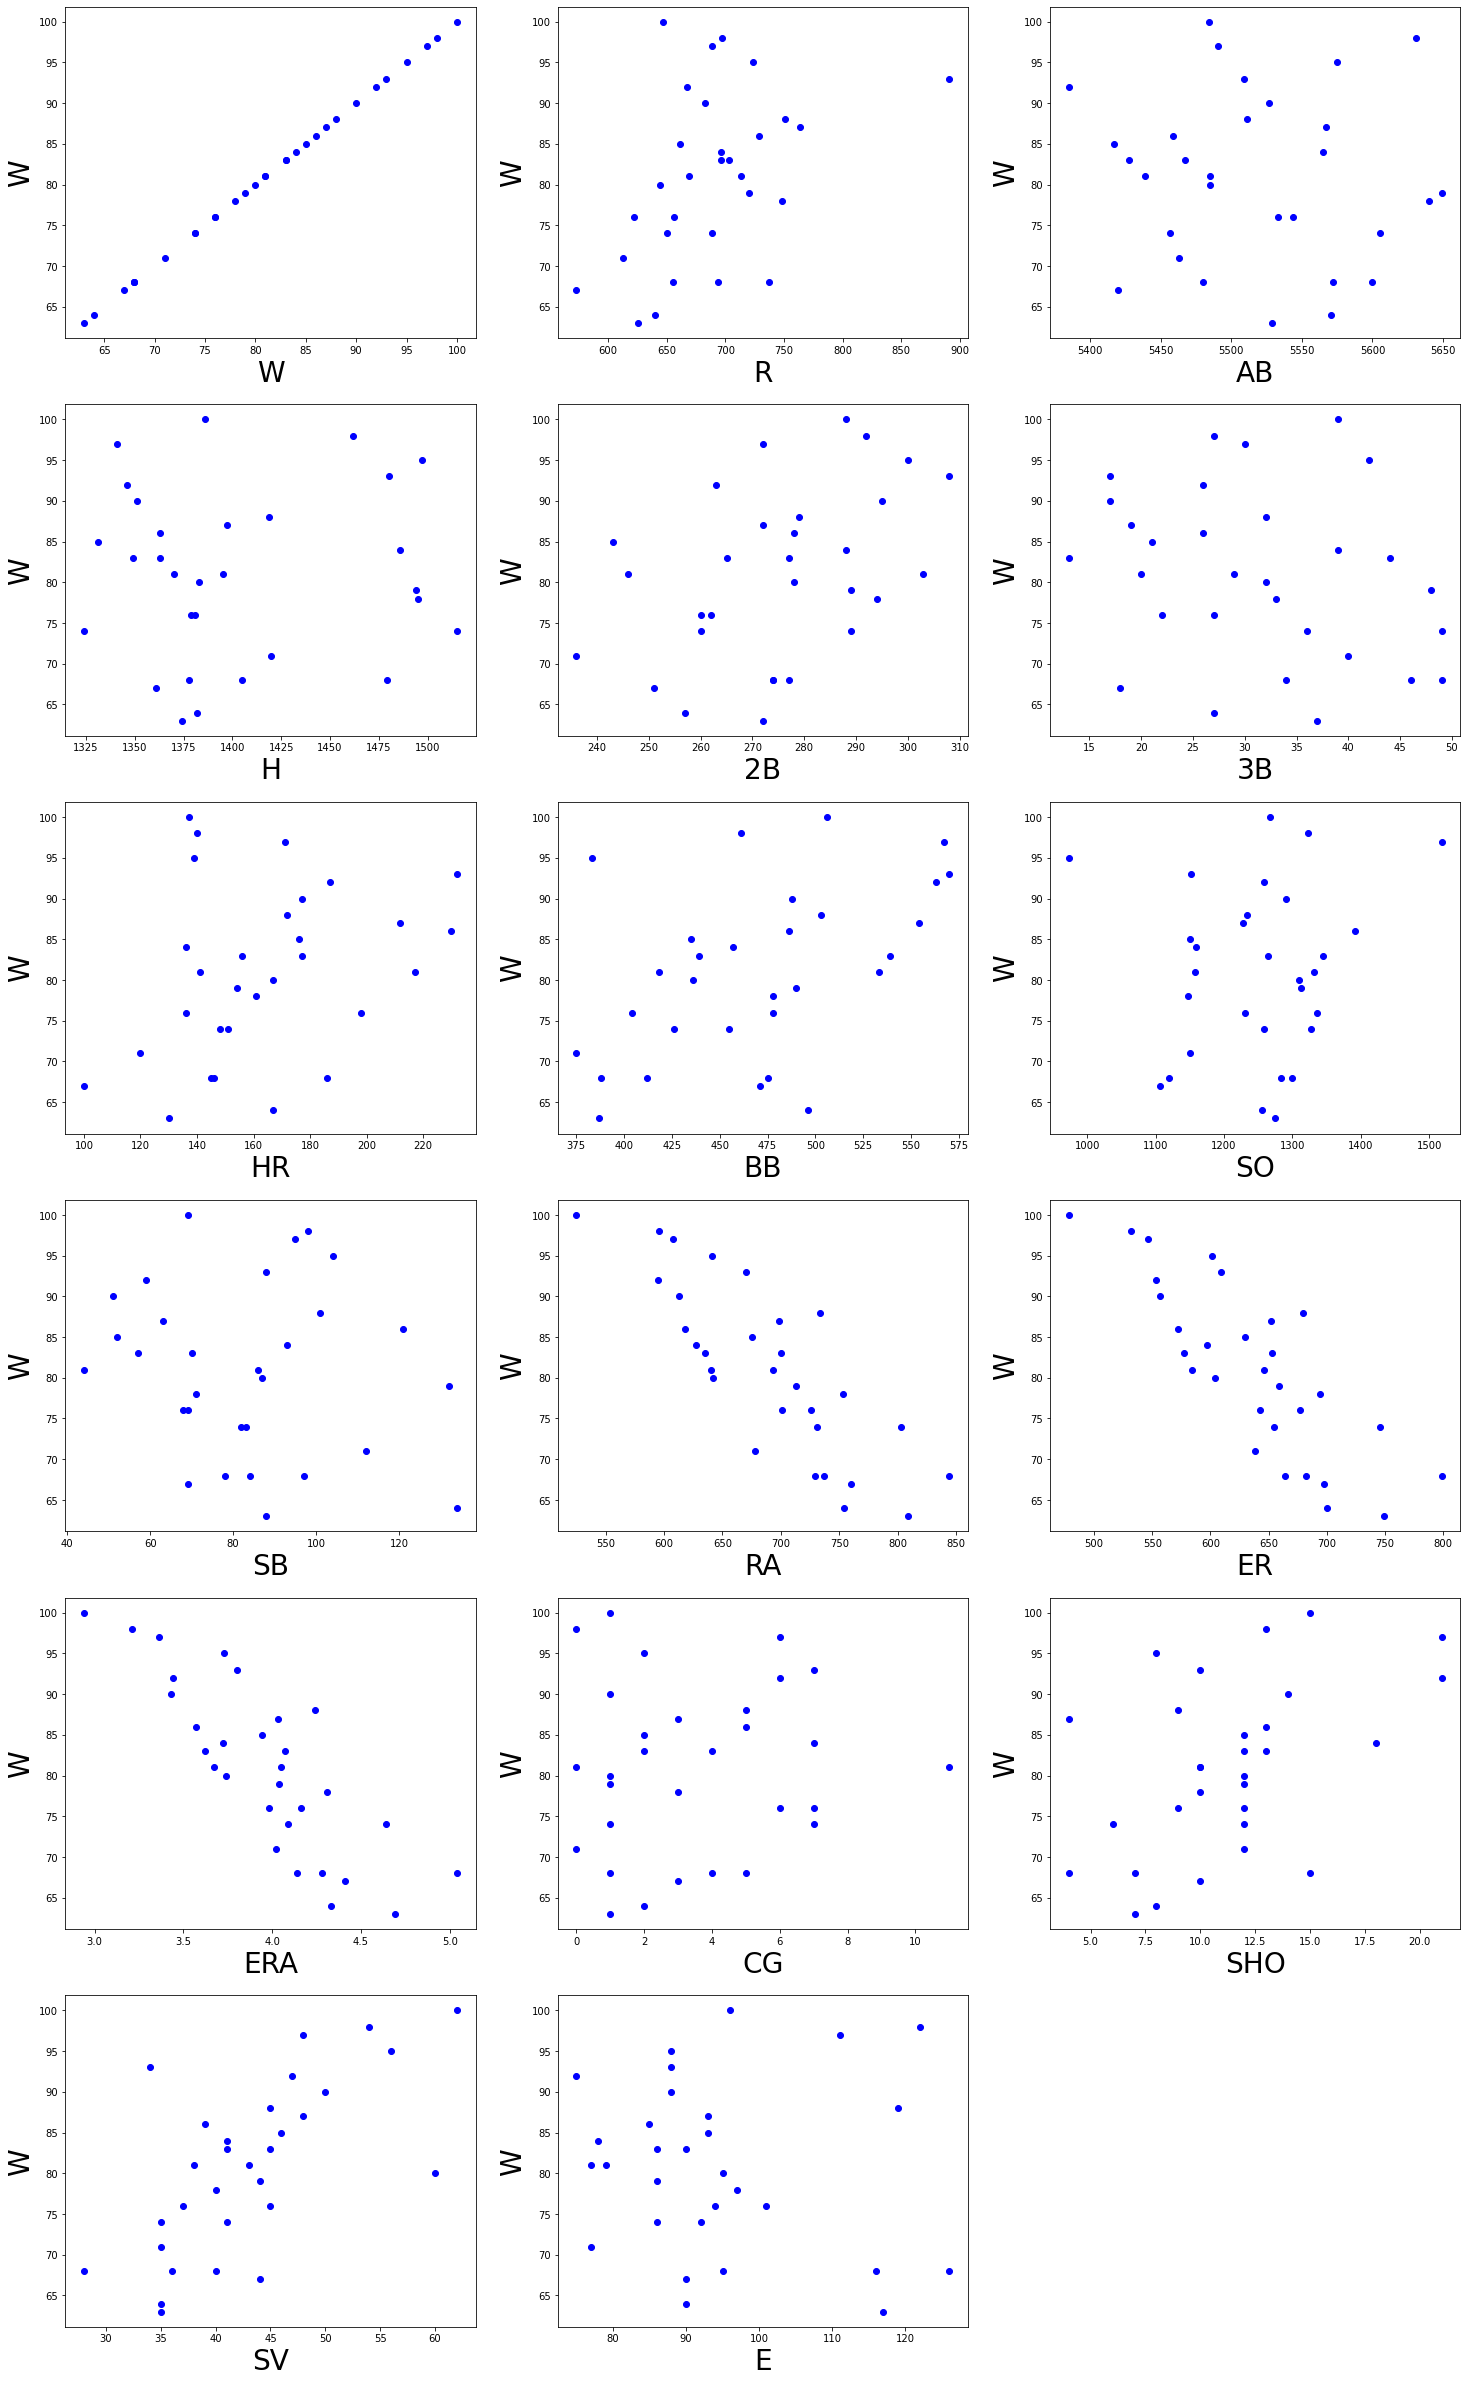

In [28]:
plt.figure(figsize=(25,50), facecolor= 'white')
plot=1

for column in df:
    if plot <=20:
        ax=plt.subplot(7,3,plot)
        plt.scatter(df[column],df['W'],color='b')
        plt.xlabel(column, fontsize = 28)
        plt.ylabel('W', fontsize = 28)
    plot += 1
plt.show()

Some of the variables from above have almost linear relationship with target W while others are not having the linear relationship with target. Also outliers are also present in some coulumn

# Multivariate Analysis

In [29]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


We will put this in a heatmap to have a better idea of the correlation between columns

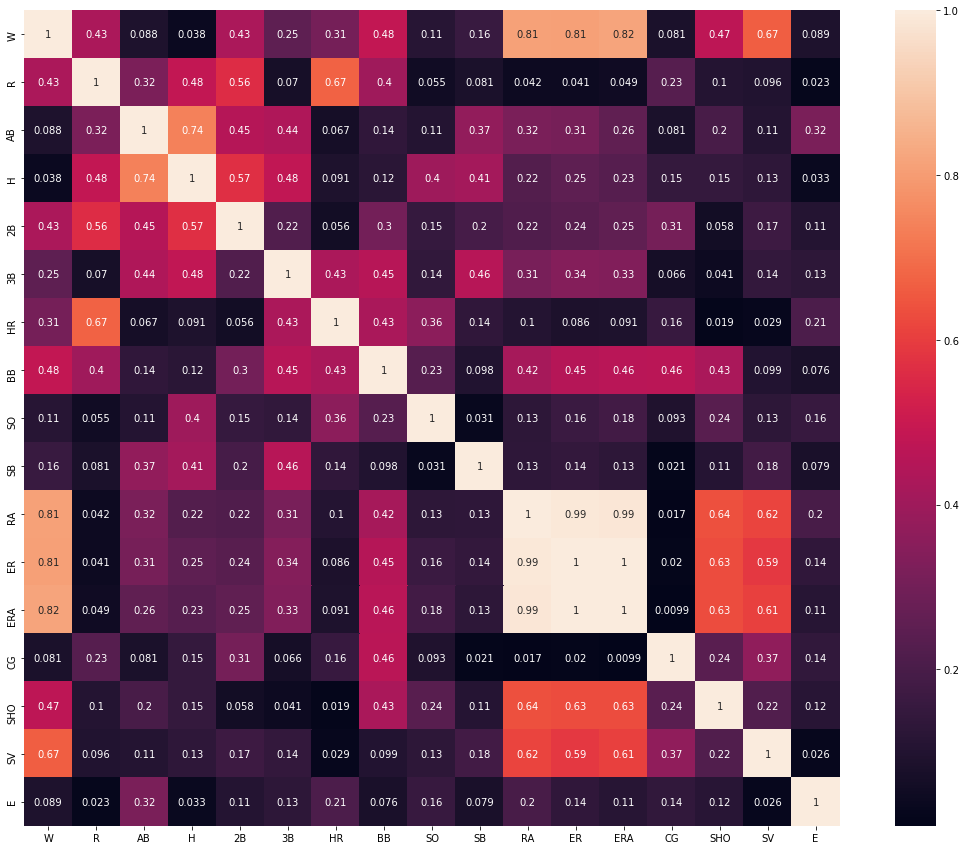

In [32]:
df_cor=df.corr().abs() # This will return the absolute value
plt.figure(figsize = (20,15))
sns.heatmap(df_cor, annot=True, square = True)
plt.show()

As we can see that RA, ER and ERA are strongly corelated with the target column 'W' and H is weekly corelated

## pairplot

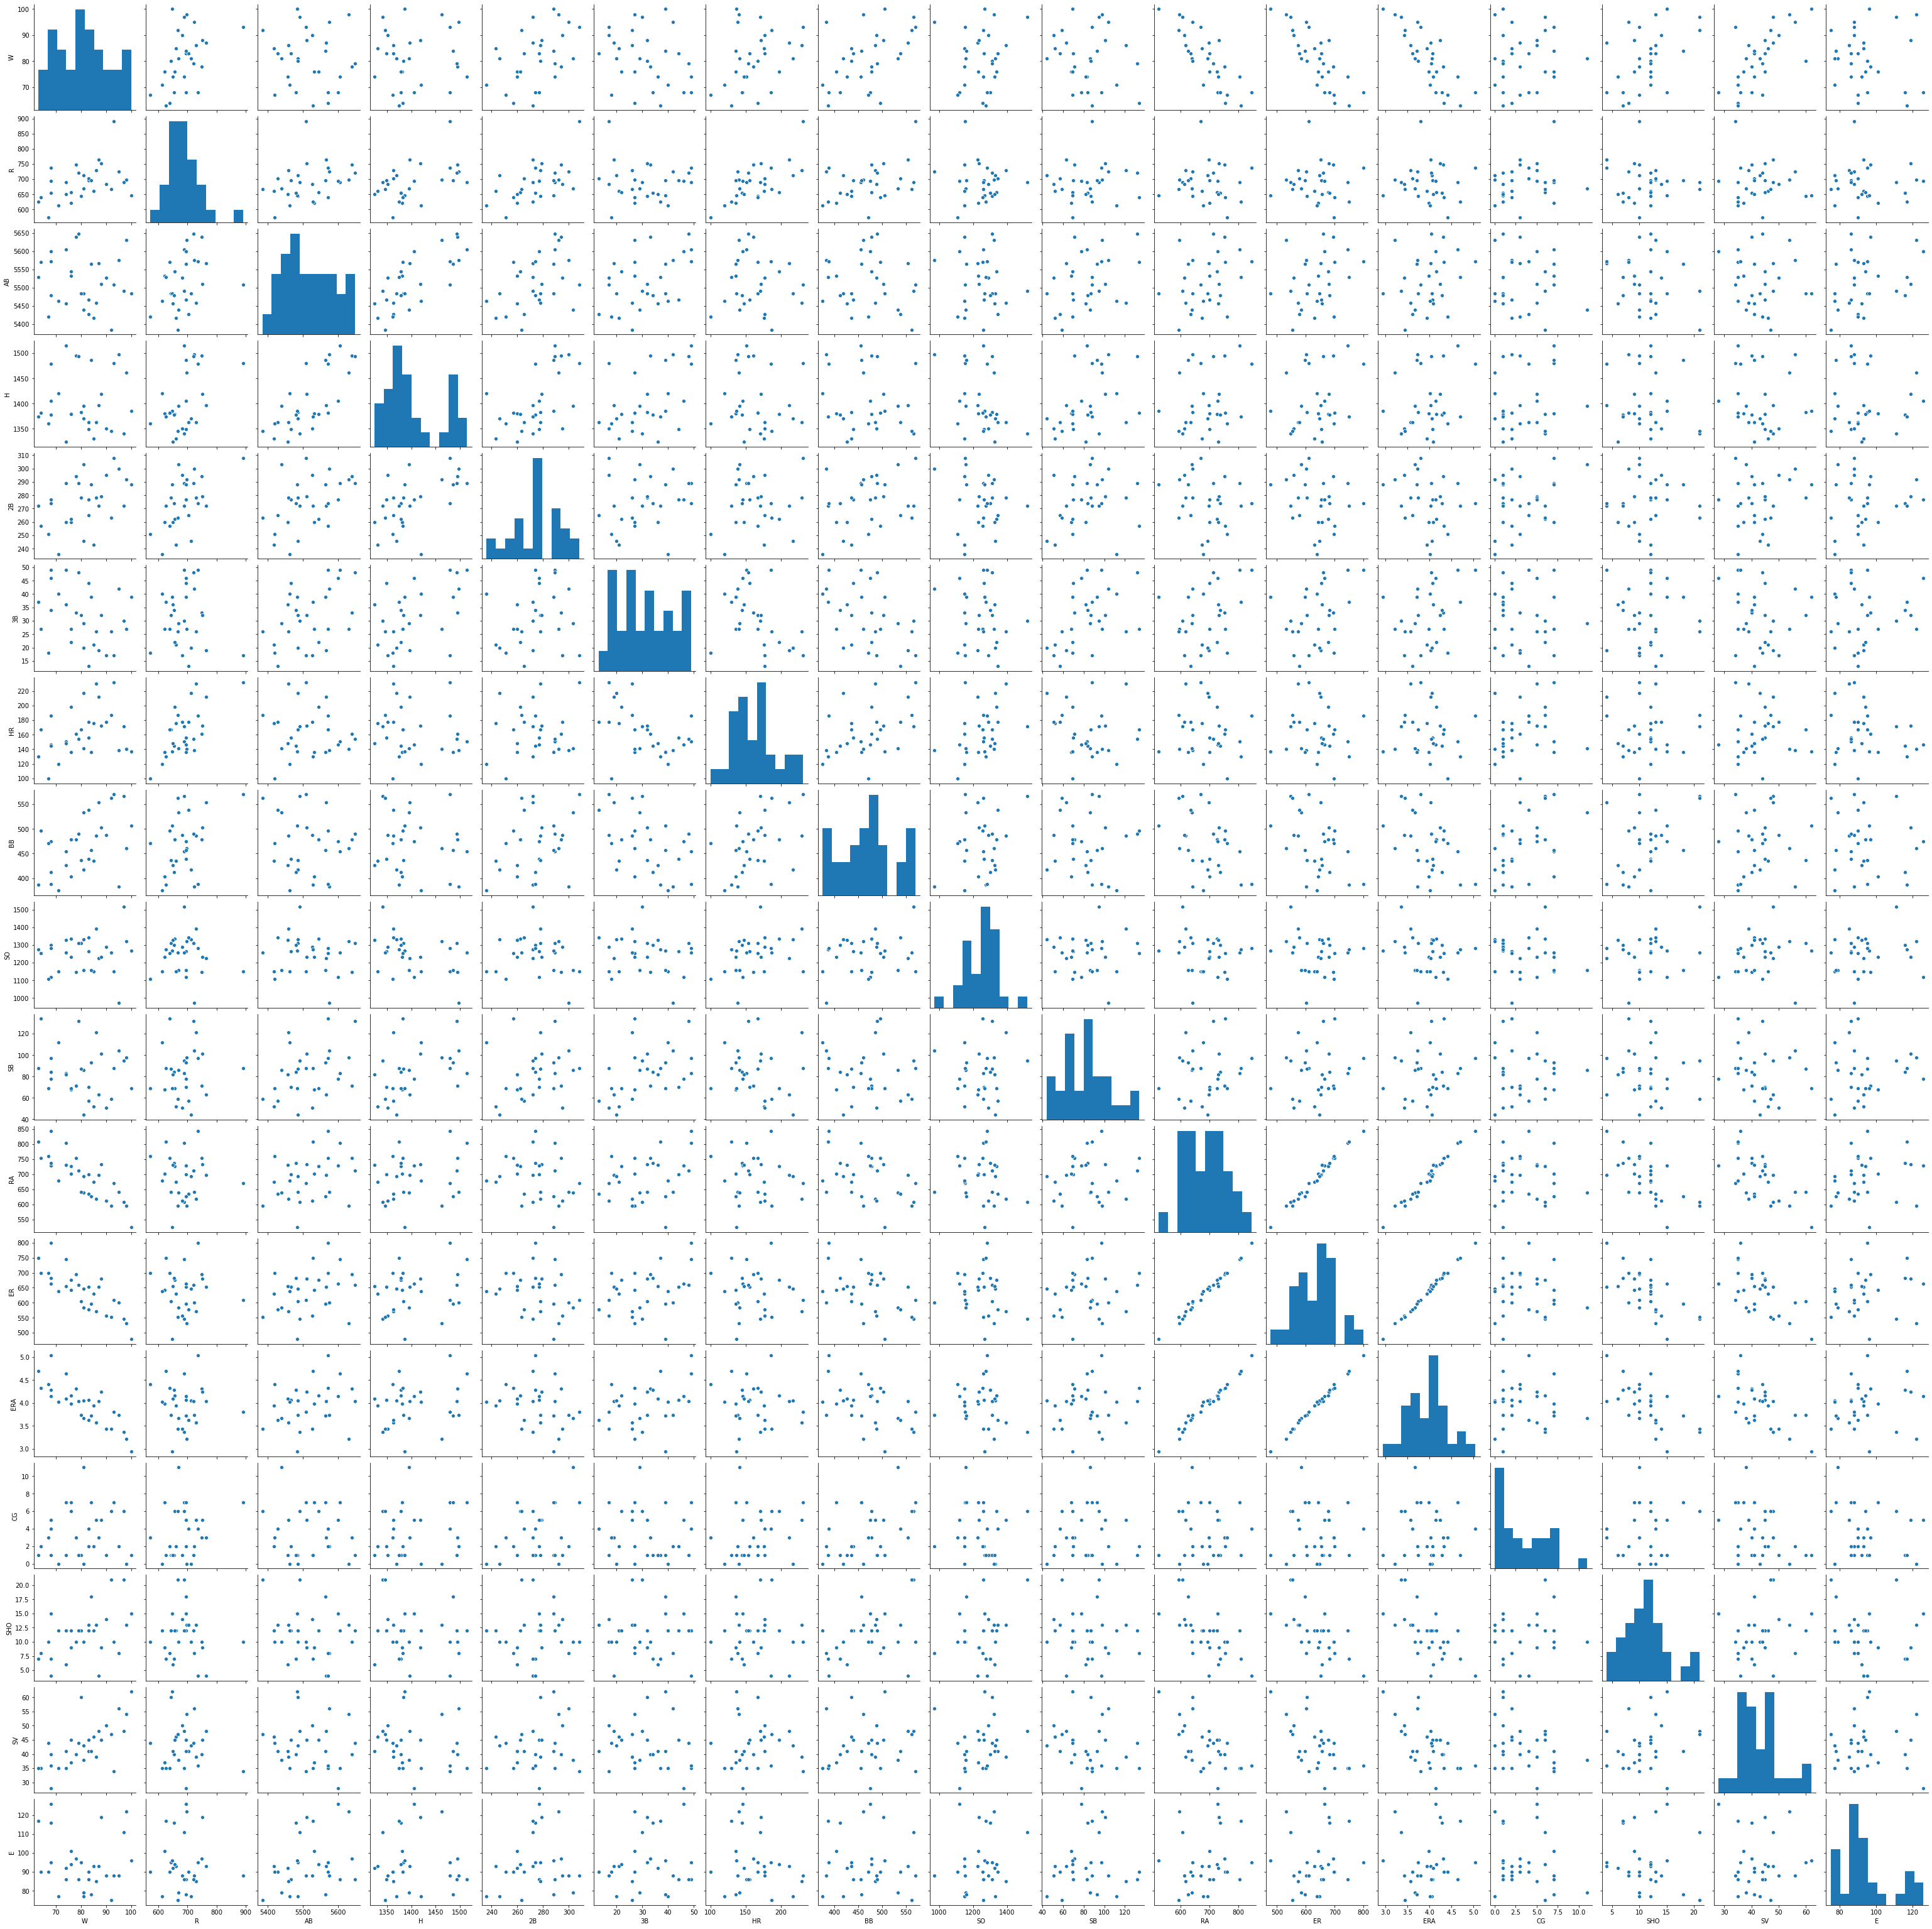

In [33]:
sns.pairplot(df)
plt.show()

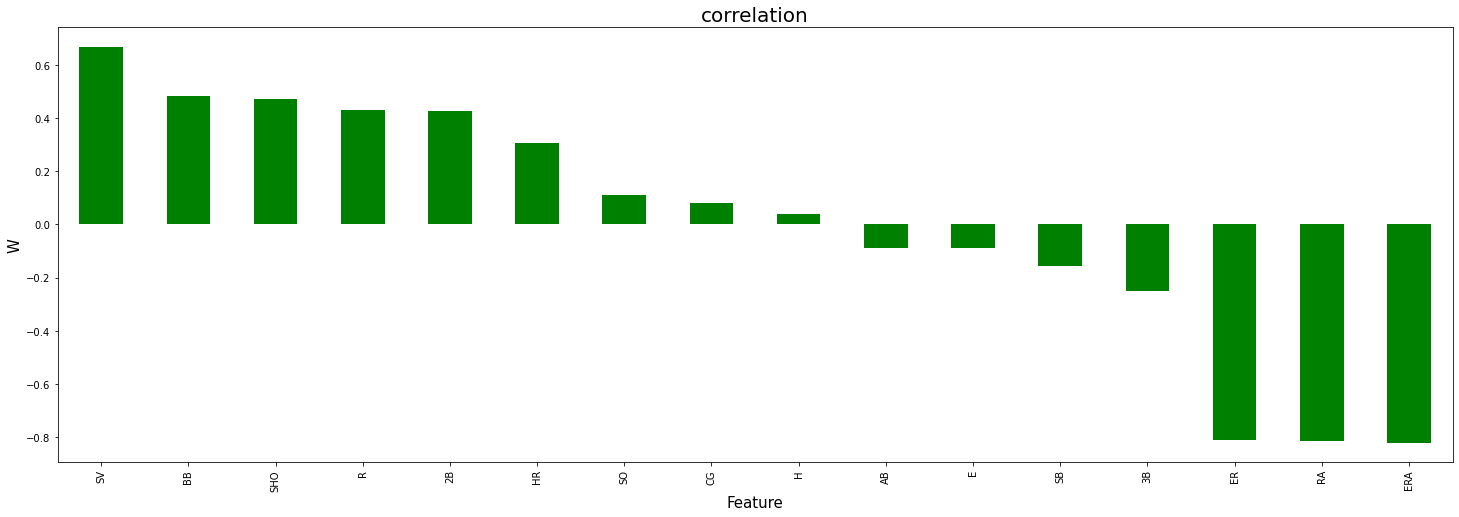

In [35]:
plt.figure(figsize=(25,8))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('W', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

As we can see here H is weekly related with the target column

In [36]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [38]:
df['H'].value_counts()

1363    2
1341    1
1497    1
1405    1
1349    1
1351    1
1480    1
1479    1
1419    1
1420    1
1486    1
1361    1
1494    1
1495    1
1370    1
1462    1
1374    1
1378    1
1379    1
1381    1
1382    1
1383    1
1386    1
1515    1
1324    1
1331    1
1395    1
1397    1
1346    1
Name: H, dtype: int64

In [47]:
df = df.drop(['H'],axis=1)

In [48]:
df

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Here we say see that H has been dropped.

# Removing Outliers

In [66]:
from scipy.stats import zscore

z_score=np.abs(zscore(df[['R','2B','3B','CG','AB','HR','BB','SO','SB','RA','ER','ERA','SHO','SV','E']]))
abs_z_score= np.abs(z_score)

In [64]:
abs_z_score

array([[0.61907797, 1.42017307, 1.04119304, 0.5398062 , 0.84773126,
        0.7872986 , 1.53490242, 2.69762957, 0.91388329, 0.66623393,
        0.50511008, 0.50695519, 0.81462859, 1.67160651, 0.46146963],
       [0.13443166, 0.12740339, 1.23580856, 0.5398062 , 0.71109353,
        0.24396668, 0.5365919 , 0.15487844, 0.60182558, 0.16597077,
        0.24892985, 0.25459752, 0.1728    , 0.24987932, 0.60719689],
       [0.33290586, 1.58879521, 0.22380785, 2.77264091, 1.1152333 ,
        0.7233772 , 1.13914361, 0.89398189, 0.11144918, 0.68033909,
        0.75162313, 0.64134684, 0.32091429, 0.65485616, 1.11724227],
       [1.14641931, 0.82812203, 0.41842337, 1.3004422 , 0.24152162,
        0.8831807 , 1.16053598, 0.16860185, 0.69098493, 0.18007593,
        0.10392217, 0.05301004, 0.56777144, 0.78410408, 0.48575751],
       [0.01327008, 0.80189192, 1.72234737, 1.3004422 , 1.28073815,
        0.40377019, 0.25136033, 0.10586628, 0.02228984, 1.61880269,
        1.59750126, 1.53131824, 0.1728    , 

In [67]:
filtering = (abs_z_score < 3).all(axis=1)
new_df = df[filtering]

All the values whose absolute zscore is less than 3 will be removed

In [68]:
new_df

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


Here we can see that all the outliers are removed.

In [69]:
new_df.shape

(29, 16)

This shoes that one row and one column have been removed due to weak corelation

# Skewness

In [71]:
new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Here we can see there are some value which are skewed whose values do not lie between -0.5 to +0.5

In [76]:
from scipy.stats import boxcox

In [73]:
new_df['E']=boxcox(new_df['E'],0)

In [74]:
new_df['SV']=boxcox(new_df['SV'],0)

In [77]:
new_df['SV'].skew()

0.09675174266622452

In [78]:
new_df['E'].skew()

0.5833075389348484

Reduced the skewness using boxcox

# Seperating the columns

In [79]:
y=new_df.iloc[:,0:1]
y.head()

,W
0,95
1,83
2,81
3,76
4,74


These are the targets

In [80]:
x=new_df.iloc[:,1:]
x.head()

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,4.025352,4.477337
1,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,3.806662,4.454347
2,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,3.637586,4.369448
3,622,5533,260,27,136,404,1231,68,701,643,3.98,7,9,3.610918,4.615121
4,689,5605,289,49,151,455,1259,83,803,746,4.64,7,12,3.555348,4.454347


These are the features

# Scaling

In [81]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [82]:
new_df1=mms.fit_transform(new_df)
new_df1

array([[0.86486486, 0.79057592, 0.71969697, 0.95522388, 0.80555556,
        0.3       , 0.04166667, 0.        , 0.66666667, 0.36363636,
        0.38317757, 0.37619048, 0.18181818, 0.23529412, 0.87196016,
        0.30811606],
       [0.54054054, 0.64397906, 0.31060606, 0.6119403 , 0.86111111,
        0.43076923, 0.33333333, 0.53394495, 0.28888889, 0.54858934,
        0.54517134, 0.53809524, 0.18181818, 0.47058824, 0.59685514,
        0.26380266],
       [0.48648649, 0.5026178 , 0.20454545, 1.        , 0.44444444,
        0.31538462, 0.82291667, 0.33761468, 0.46666667, 0.36050157,
        0.33021807, 0.34761905, 1.        , 0.35294118, 0.38416175,
        0.1001549 ],
       [0.35135135, 0.2565445 , 0.56060606, 0.35820896, 0.38888889,
        0.27692308, 0.15104167, 0.4733945 , 0.26666667, 0.55172414,
        0.51401869, 0.4952381 , 0.63636364, 0.29411765, 0.35061382,
        0.57370078],
       [0.2972973 , 0.60732984, 0.83333333, 0.79104478, 1.        ,
        0.39230769, 0.41666667, 

Scaling Done

In [103]:
x_data=new_df.iloc[:,1::]
x_data.head(3)

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,300,42,139,383,973,104,641,601,3.73,2,8,4.025352,4.477337
1,696,5467,277,44,156,439,1264,70,700,653,4.07,2,12,3.806662,4.454347
2,669,5439,303,29,141,533,1157,86,640,584,3.67,11,10,3.637586,4.369448


In [104]:
y_data=new_df.iloc[:,0:1]
y_data.head(3)

,W
0,95
1,83
2,81


In [83]:
new_df1=pd.DataFrame(new_df1)
new_df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.864865,0.790576,0.719697,0.955224,0.805556,0.300000,0.041667,0.000000,0.666667,0.363636,0.383178,0.376190,0.181818,0.235294,0.871960,0.308116
1,0.540541,0.643979,0.310606,0.611940,0.861111,0.430769,0.333333,0.533945,0.288889,0.548589,0.545171,0.538095,0.181818,0.470588,0.596855,0.263803
2,0.486486,0.502618,0.204545,1.000000,0.444444,0.315385,0.822917,0.337615,0.466667,0.360502,0.330218,0.347619,1.000000,0.352941,0.384162,0.100155
3,0.351351,0.256545,0.560606,0.358209,0.388889,0.276923,0.151042,0.473394,0.266667,0.551724,0.514019,0.495238,0.636364,0.294118,0.350614,0.573701
4,0.297297,0.607330,0.833333,0.791045,1.000000,0.392308,0.416667,0.524771,0.433333,0.871473,0.834891,0.809524,0.636364,0.470588,0.280708,0.263803
5,0.648649,1.000000,0.689394,0.537313,0.166667,0.861538,0.932292,0.466055,0.211111,0.542320,0.542056,0.519048,0.272727,0.000000,0.678043,0.414638
6,0.486486,0.732984,0.378788,0.149254,0.194444,0.900000,0.223958,0.656881,0.000000,0.526646,0.523364,0.528571,0.000000,0.352941,0.539665,0.050728
7,0.459459,0.371728,0.378788,0.626866,0.527778,0.515385,0.317708,0.618349,0.477778,0.366771,0.392523,0.380952,0.090909,0.470588,0.958751,0.455651
8,0.405405,0.916230,0.965909,0.865672,0.555556,0.469231,0.536458,0.321101,0.300000,0.714734,0.672897,0.652381,0.272727,0.352941,0.448687,0.495809
9,0.675676,0.931937,0.477273,0.641791,0.527778,0.553846,0.666667,0.477064,0.633333,0.652038,0.629283,0.619048,0.454545,0.294118,0.596855,0.889824


Converted scaled values into a DataFrame

# Finding the best random state

In [85]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=.3,random_state=12)

Spliiting for Training and Testing

In [106]:
lr.fit(x_train,y_train)

LinearRegression()

Fitting Linear Regression in x-train and y-train

In [107]:
lr.coef_

array([[ 1.08163304e-01, -6.25044694e-03, -1.51013404e-01,
         5.20271116e-03, -1.49619256e-02, -2.01305186e-02,
        -9.26599186e-03,  4.00810202e-02,  1.10430040e-01,
        -2.29268699e-01,  9.06161575e+00,  1.04504338e+00,
         3.66215096e-01,  4.11568693e+01,  5.41693380e+00]])

Here we got Linear Regression Coeffecient

In [108]:
lr.intercept_

array([-50.50145639])

Here we got Linear Regression Constant

In [109]:
pred_test=lr.predict(x_test)

In [110]:
pred_test

array([[88.05613479],
       [93.93121693],
       [69.99172614],
       [88.78424568],
       [80.68254245],
       [84.49080317],
       [67.69612288],
       [96.85300365],
       [72.09530387]])

This is the preddicted Value

In [111]:
y_test

,W
8,80
16,98
22,71
10,88
1,83
20,90
4,74
15,100
23,67


And this is the actual value

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("mean absoute value",mean_absolute_error(y_test,pred_test))
print("mean squared error",mean_squared_error(y_test,pred_test))
print ("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test)))

mean absoute value 4.032252122385703
mean squared error 21.601599361603892
Root mean squared error 4.6477520761766


In [113]:
print(r2_score(y_test,pred_test))

0.8193547854336243


# Deciding the Regressor Model

In [114]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.7161293253816299


In [115]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 59.47335554639231
MAE: 6.507875412004378
r2_score: 0.6334133973346494


Checking for SVR LINEAR

In [116]:
svr_p = SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.0007783046640227331


In [117]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 59.47335554639231
MAE: 6.507875412004378
r2_score: 0.6334133973346494


Checking for SVR POLY

In [118]:
svr_r = SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)
-0.005560280844834953

-0.003855979166528689


-0.005560280844834953

In [119]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 59.47335554639231
MAE: 6.507875412004378
r2_score: 0.6334133973346494


Checking for SVR RBF

In [121]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
rf_pred=rf.predict(x_test)

0.9548496796182686


In [122]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 59.47335554639231
MAE: 6.507875412004378
r2_score: 0.6334133973346494


Checked the accuracy AND r2 score of RANDOM FOREST REGRESSOR

In [123]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print(dtr.score(x_train,y_train))
dtr_pred=dtr.predict(x_test)

1.0


In [124]:
print('MSE:',mean_squared_error(dtr_pred,y_test))
print('MAE:',mean_absolute_error(dtr_pred,y_test))
print('r2_score:',r2_score(dtr_pred,y_test))

MSE: 111.0
MAE: 8.777777777777779
r2_score: 0.001887211367673114


Checked the accuracy for DECISON TREE REGRESSOR

In [125]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
gbr_pred=gbr.predict(x_test)

0.9999999897535541


In [126]:
print('MSE:',mean_squared_error(gbr_pred,y_test))
print('MAE:',mean_absolute_error(gbr_pred,y_test))
print('r2_score:',r2_score(gbr_pred,y_test))

MSE: 98.55564686826432
MAE: 8.454277716019467
r2_score: 0.05676913829952135


Check the accuracy for GRADIENT BOOSTING REGRESSOR

# Regularization

Regularization is a technique used to reduce the erros

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [128]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,1,10],
            'random_state':list(range(0,10)),
            'fit_intercept':[True,False],
            'selection':['cyclic', 'random']}
ls = Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'fit_intercept': False, 'random_state': 9, 'selection': 'random'}


These are the best parameters

In [130]:
ls = Lasso(alpha=0.0001,random_state=2,fit_intercept=False,selection ='random')
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.7441580505158023

# Cross Validation

It is used determine which model to use after comparing the accuracy score of both

In [131]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.4180216096011133

In [132]:
from sklearn.model_selection import cross_val_score 
print(cross_val_score(dtr,x,y,cv=5).mean())

-2.0222738761553307


In [133]:
print(cross_val_score(svr,x,y,cv=5).mean())

-0.8224419953627032


In [134]:
print(cross_val_score(svr_r,x,y,cv=5).mean())

-0.42870954725769544


In [135]:
print(cross_val_score(svr_p,x,y,cv=5).mean())

-0.4217233047883274


In [136]:
print(cross_val_score(gbr,x,y,cv=5).mean())

-1.3651909458025755


In [137]:
print(cross_val_score(rf,x,y,cv=5).mean())

-0.46658156039285303


# Ensemble Technique

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'n_estimators':[100],
            'criterion':['mse'],
            'min_samples_split':[2],
            'min_samples_leaf':[1]}

In [139]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [140]:
rf= RandomForestRegressor(criterion="mse",min_samples_leaf=1,min_samples_split=2,n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print("R2_score",rfs*100)

rfs_score=cross_val_score(rf,x,y,cv=5)
rfc=rfs_score.mean()
print("Cross_val_score",rfc*100)

R2_score 35.63813442081353
Cross_val_score -67.24928275029302


R2 score improved by 35%

# Saving Model

In [141]:
import pickle
filename='Baseball.pkl'
pickle.dump(rf,open(filename,'wb'))

Model Saved

# Conclusion

In [142]:
loaded_model=pickle.load(open('Baseball.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.3563813442081353


In [143]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])

In [144]:
conclusion

,0,1,2,3,4,5,6,7,8
Predicted,88.74,90.57,82.95,71.86,79.48,90.12,70.56,90.21,73.14
Original,88.74,90.57,82.95,71.86,79.48,90.12,70.56,90.21,73.14


Predicted and Orignal values are almost same